In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter
from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings('ignore')


# set up formatting for x axis time values
monthfmt = DateFormatter("%b")
yearfmt = DateFormatter("%Y")

def combinedfmt(x,pos):
    string = monthfmt(x)
    if string == "Jan":
        string += "\n" + yearfmt(x)
    return string

def format_date_ax(ax):
    ax.xaxis.set_major_locator(MonthLocator((1,4,7,10)))
    ax.xaxis.set_major_formatter(FuncFormatter(combinedfmt))
    plt.setp(ax.get_xticklabels(), rotation=0, horizontalalignment='center');
    return None

---

### Brightness Temperature Summary Statistics

In [2]:
# open csv file with summary stats
df = pd.read_csv('goes_modis_aster_tb_summary_stats.csv')
# set datetime to aster_datetime
df['datetime'] = pd.to_datetime(df.aster_datetime.copy())
# uset this as the index
df.set_index('datetime', inplace=True)

# add an R-squared column for each diff
df['ast_mod_r2_value'] = df.ast_mod_r_value.copy()**2
df['ast_goes_r2_value'] = df.ast_goes_r_value.copy()**2
df['mod_goes_r2_value'] = df.mod_goes_r_value.copy()**2

# filter out anything with Number of Pixels < 45000

df = df.where(df.ast_mod_n >= 45000)

# preview
df.head(1)

,Unnamed: 0,bounding_geometry,aster_filepath,aster_datetime,modis_filepath,modis_datetime,goes_filepath,goes_datetime,ast_mod_n,ast_mod_mean_diff,...,mod_goes_rms_diff,mod_goes_std_diff,mod_goes_slope,mod_goes_intercept,mod_goes_r_value,mod_goes_p_value,mod_goes_std_err,ast_mod_r2_value,ast_goes_r2_value,mod_goes_r2_value
datetime,,,,,,,,,,,,,,,,,,,,,
2017-03-04 18:51:03+00:00,0.0,"[{'type': 'Polygon', 'coordinates': [[[285000,...",/storage/spestana/ASTER/AST_L1T/geotiff/T/T_ba...,2017-03-04 18:51:03+00:00,/storage/MODIS/Tuolumne_MOD021KM/MOD021KM.A201...,2017-03-04 18:50:00+00:00,/storage/GOES/orthorectified/2017/03/4/ABI-L1b...,2017-03-04 18:50:31+00:00,49284.0,-1.15041,...,2.906833,2.856452,0.967287,0.16118,0.915004,0.0,0.001921,0.484331,0.552372,0.837232


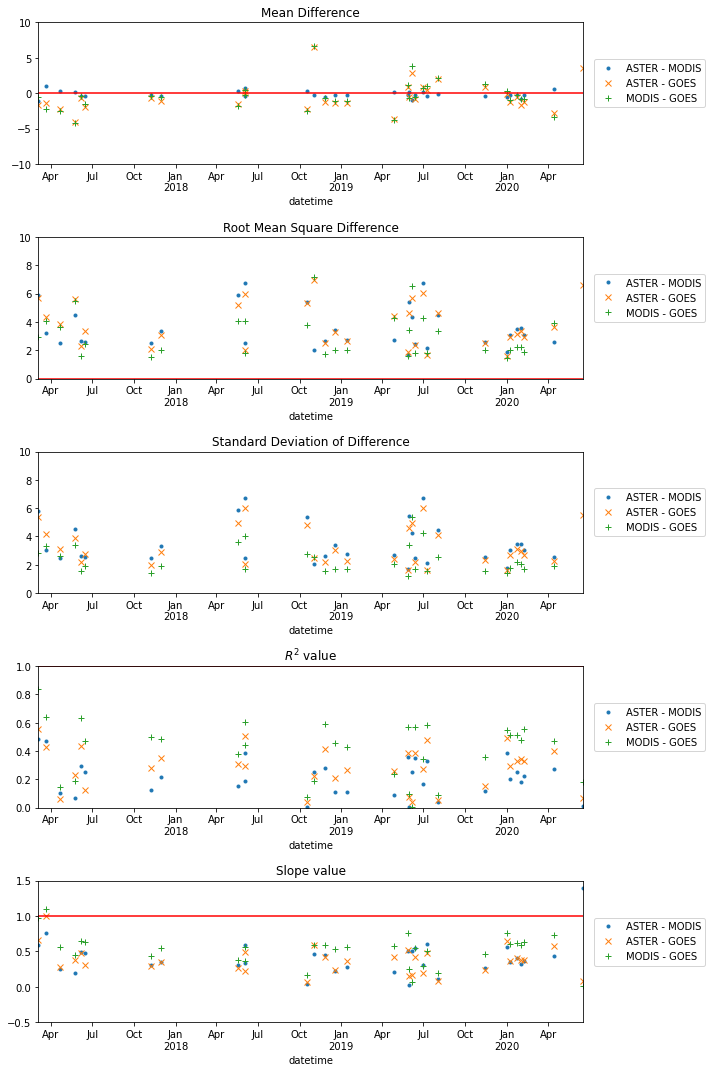

In [3]:
fig, ax = plt.subplots(5,1,figsize=(10,15), tight_layout=True)

df.ast_mod_mean_diff.plot(linestyle='none', marker='.', ax=ax[0], label='ASTER - MODIS')
df.ast_goes_mean_diff.plot(linestyle='none', marker='x', ax=ax[0],  label='ASTER - GOES')
df.mod_goes_mean_diff.plot(linestyle='none', marker='+', ax=ax[0],  label='MODIS - GOES')
ax[0].set_title('Mean Difference')
ax[0].set_ylim(-10,10)
ax[0].axhline(0,c='r')

df.ast_mod_rms_diff.plot(linestyle='none', marker='.',  ax=ax[1], label='ASTER - MODIS')
df.ast_goes_rms_diff.plot(linestyle='none', marker='x', ax=ax[1],  label='ASTER - GOES')
df.mod_goes_rms_diff.plot(linestyle='none', marker='+', ax=ax[1],  label='MODIS - GOES')
ax[1].set_title('Root Mean Square Difference')
ax[1].set_ylim(0,10)
ax[1].axhline(0,c='r')

df.ast_mod_std_diff.plot(linestyle='none', marker='.',  ax=ax[2], label='ASTER - MODIS')
df.ast_goes_std_diff.plot(linestyle='none', marker='x', ax=ax[2],  label='ASTER - GOES')
df.mod_goes_std_diff.plot(linestyle='none', marker='+', ax=ax[2],  label='MODIS - GOES')
ax[2].set_title('Standard Deviation of Difference')
ax[2].set_ylim(0,10)

df.ast_mod_r2_value.plot(linestyle='none', marker='.',  ax=ax[3], label='ASTER - MODIS')
df.ast_goes_r2_value.plot(linestyle='none', marker='x', ax=ax[3],  label='ASTER - GOES')
df.mod_goes_r2_value.plot(linestyle='none', marker='+', ax=ax[3],  label='MODIS - GOES')
ax[3].set_title('$R^2$ value')
ax[3].set_ylim(0,1)
ax[3].axhline(1,c='r')

df.ast_mod_slope.plot(linestyle='none', marker='.',  ax=ax[4], label='ASTER - MODIS')
df.ast_goes_slope.plot(linestyle='none', marker='x', ax=ax[4],  label='ASTER - GOES')
df.mod_goes_slope.plot(linestyle='none', marker='+', ax=ax[4],  label='MODIS - GOES')
ax[4].set_title('Slope value')
ax[4].set_ylim(-0.5,1.5)
ax[4].axhline(1,c='r')

for this_ax in ax:
    format_date_ax(this_ax)
    this_ax.legend(loc=(1.02,0.4))


---

### Radiance Summary Statistics

In [4]:
# open csv file with summary stats
df = pd.read_csv('goes_modis_aster_rad_summary_stats.csv')
# set datetime to aster_datetime
df['datetime'] = pd.to_datetime(df.aster_datetime.copy())
# uset this as the index
df.set_index('datetime', inplace=True)

# add an R-squared column for each diff
df['ast_mod_r2_value'] = df.ast_mod_r_value.copy()**2
df['ast_goes_r2_value'] = df.ast_goes_r_value.copy()**2
df['mod_goes_r2_value'] = df.mod_goes_r_value.copy()**2

# filter out anything with Number of Pixels < 45000

df = df.where(df.ast_mod_n >= 45000)

# preview
df.head(1)

,Unnamed: 0,bounding_geometry,aster_filepath,aster_datetime,modis_filepath,modis_datetime,goes_filepath,goes_datetime,ast_mod_n,ast_mod_mean_diff,...,mod_goes_rms_diff,mod_goes_std_diff,mod_goes_slope,mod_goes_intercept,mod_goes_r_value,mod_goes_p_value,mod_goes_std_err,ast_mod_r2_value,ast_goes_r2_value,mod_goes_r2_value
datetime,,,,,,,,,,,,,,,,,,,,,
2017-03-04 18:51:03+00:00,0.0,"[{'type': 'Polygon', 'coordinates': [[[285000,...",/storage/spestana/ASTER/AST_L1T/geotiff/T/T_ba...,2017-03-04 18:51:03+00:00,/storage/MODIS/Tuolumne_MOD021KM/MOD021KM.A201...,2017-03-04 18:50:00+00:00,/storage/GOES/orthorectified/2017/03/4/ABI-L1b...,2017-03-04 18:50:31+00:00,49284.0,-0.103976,...,0.276493,0.270627,0.959189,0.262463,0.91221,0.0,0.001941,0.477916,0.55539,0.832128


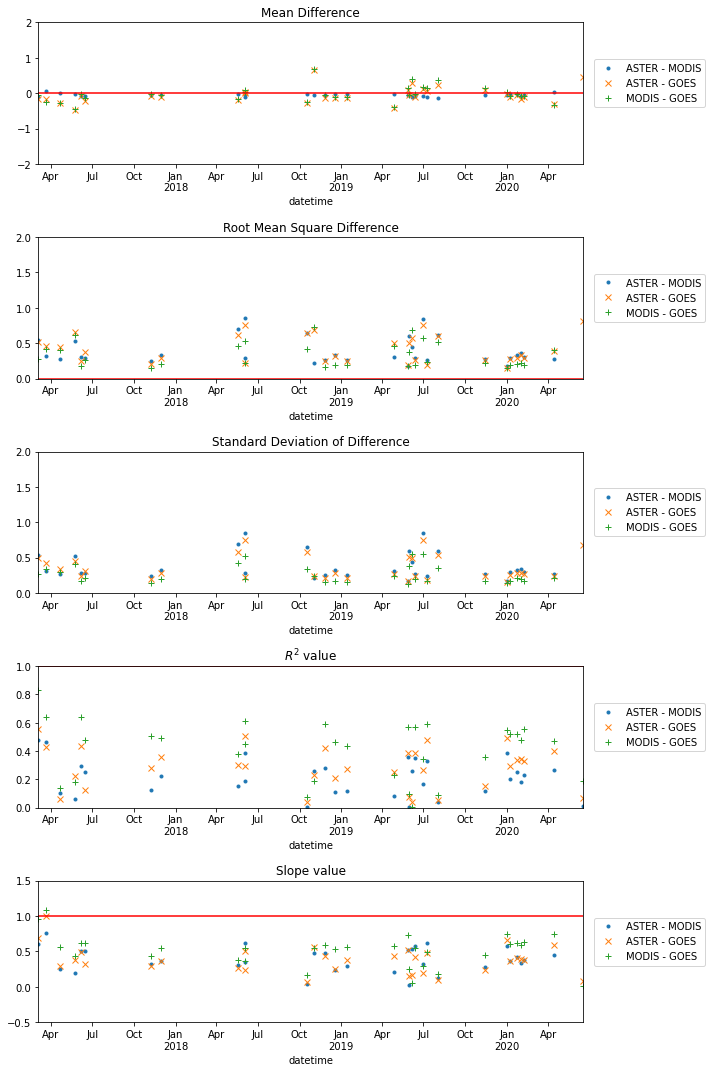

In [5]:
fig, ax = plt.subplots(5,1,figsize=(10,15), tight_layout=True)

df.ast_mod_mean_diff.plot(linestyle='none', marker='.', ax=ax[0], label='ASTER - MODIS')
df.ast_goes_mean_diff.plot(linestyle='none', marker='x', ax=ax[0],  label='ASTER - GOES')
df.mod_goes_mean_diff.plot(linestyle='none', marker='+', ax=ax[0],  label='MODIS - GOES')
ax[0].set_title('Mean Difference')
ax[0].set_ylim(-2,2)
ax[0].axhline(0,c='r')

df.ast_mod_rms_diff.plot(linestyle='none', marker='.',  ax=ax[1], label='ASTER - MODIS')
df.ast_goes_rms_diff.plot(linestyle='none', marker='x', ax=ax[1],  label='ASTER - GOES')
df.mod_goes_rms_diff.plot(linestyle='none', marker='+', ax=ax[1],  label='MODIS - GOES')
ax[1].set_title('Root Mean Square Difference')
ax[1].set_ylim(0,2)
ax[1].axhline(0,c='r')

df.ast_mod_std_diff.plot(linestyle='none', marker='.',  ax=ax[2], label='ASTER - MODIS')
df.ast_goes_std_diff.plot(linestyle='none', marker='x', ax=ax[2],  label='ASTER - GOES')
df.mod_goes_std_diff.plot(linestyle='none', marker='+', ax=ax[2],  label='MODIS - GOES')
ax[2].set_title('Standard Deviation of Difference')
ax[2].set_ylim(0,2)

df.ast_mod_r2_value.plot(linestyle='none', marker='.',  ax=ax[3], label='ASTER - MODIS')
df.ast_goes_r2_value.plot(linestyle='none', marker='x', ax=ax[3],  label='ASTER - GOES')
df.mod_goes_r2_value.plot(linestyle='none', marker='+', ax=ax[3],  label='MODIS - GOES')
ax[3].set_title('$R^2$ value')
ax[3].set_ylim(0,1)
ax[3].axhline(1,c='r')

df.ast_mod_slope.plot(linestyle='none', marker='.',  ax=ax[4], label='ASTER - MODIS')
df.ast_goes_slope.plot(linestyle='none', marker='x', ax=ax[4],  label='ASTER - GOES')
df.mod_goes_slope.plot(linestyle='none', marker='+', ax=ax[4],  label='MODIS - GOES')
ax[4].set_title('Slope value')
ax[4].set_ylim(-0.5,1.5)
ax[4].axhline(1,c='r')

for this_ax in ax:
    format_date_ax(this_ax)
    this_ax.legend(loc=(1.02,0.4))
